In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
df = pd.read_csv("C:/Users/VIHASHINI/Downloads/archive (4)/covid_19_clean_complete.csv")

print(df.head(10))




                 Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

         Date  Confirmed  Deaths  Recovered  Active             WHO Region  
0  2020-01-22          0       0          0       0  Eastern Med

In [100]:
df.columns


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [101]:
df.shape

(49068, 10)

In [102]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [103]:
df.isnull().sum()



Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [106]:
df['Country/Region'].nunique()

187

In [107]:
df1['Date'].max()

'2020-07-27'

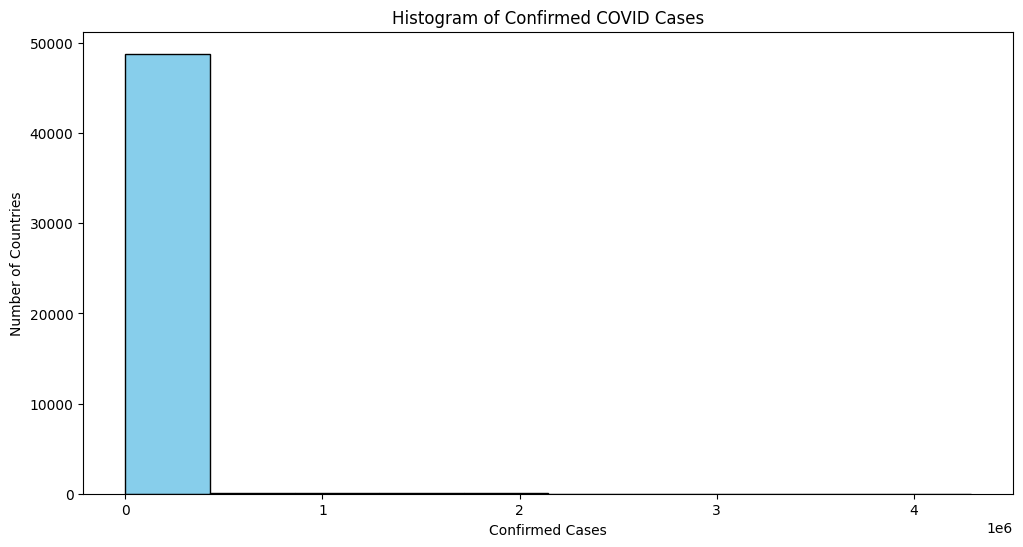

In [108]:

plt.figure(figsize=(12,6))
plt.hist(df['Confirmed'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Confirmed Cases')
plt.ylabel('Number of Countries')
plt.title('Histogram of Confirmed COVID Cases')
plt.show()


In [109]:
df['Date'] = pd.to_datetime(df['Date'])


latest_data = df[df['Date'] == df['Date'].max()]
country_summary = latest_data.groupby('Country/Region')['Confirmed'].sum()


top_10 = country_summary.nlargest(10)

print(top_10)

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Name: Confirmed, dtype: int64


In [110]:
country_deaths = latest_data.groupby('Country/Region')['Deaths'].sum()

top_10_death = country_deaths.nlargest(10)

print(top_10_death)

Country/Region
US                148011
Brazil             87618
United Kingdom     45844
Mexico             44022
Italy              35112
India              33408
France             30212
Spain              28432
Peru               18418
Iran               15912
Name: Deaths, dtype: int64


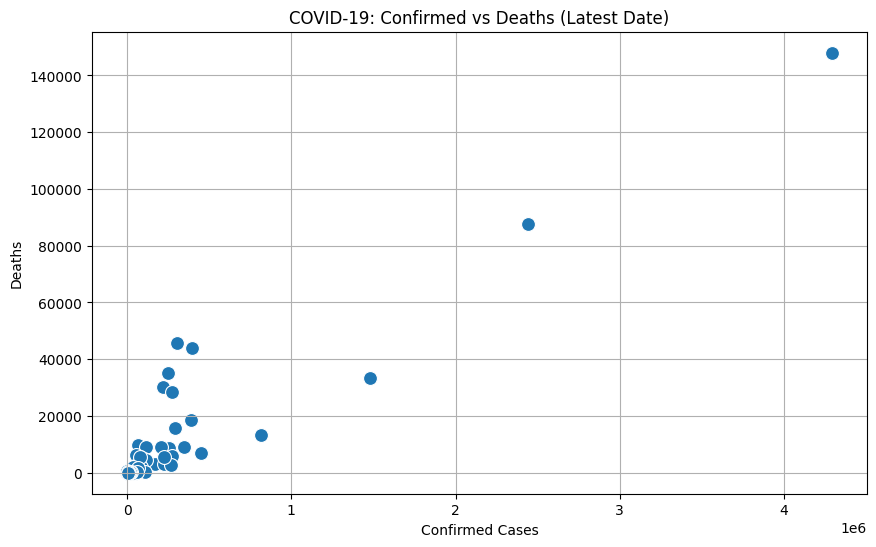

In [111]:
country_summary = latest_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=country_summary, x='Confirmed', y='Deaths', s=100)

plt.title('COVID-19: Confirmed vs Deaths (Latest Date)')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

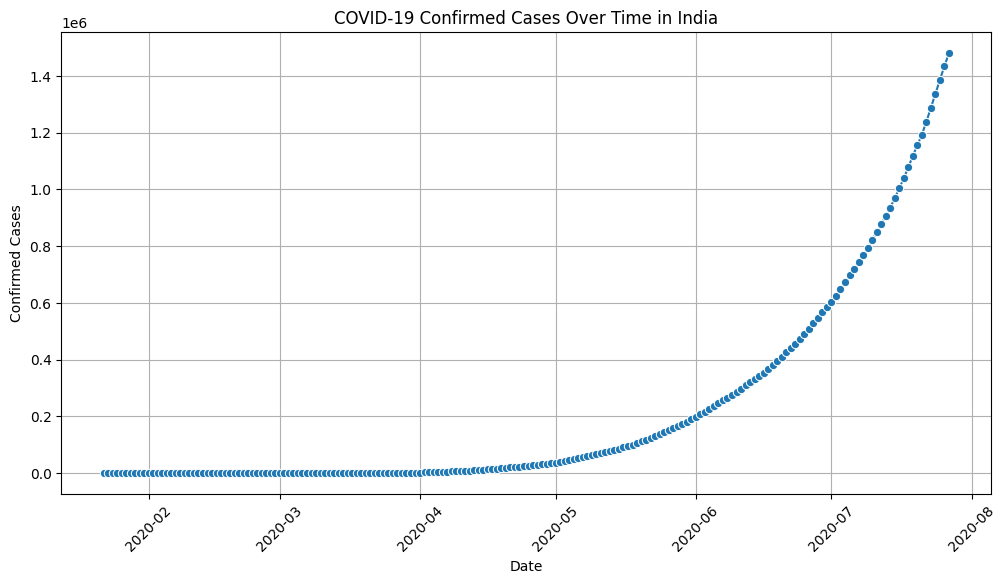

In [112]:
india_data = df[df['Country/Region'] == 'India']

india_daily = india_data.groupby('Date')['Confirmed'].sum().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=india_daily, x='Date', y='Confirmed', marker='o')

plt.title('COVID-19 Confirmed Cases Over Time in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\VIHASHINI\AppData\Local\Temp\ipykernel_3168\3817805551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Continent'] = latest_data['Country/Region'].map(continent_map)
C:\Users\VIHASHINI\AppData\Local\Temp\ipykernel_3168\3817805551.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_summary, x='Continent', y='Confirmed', palette='viridis')


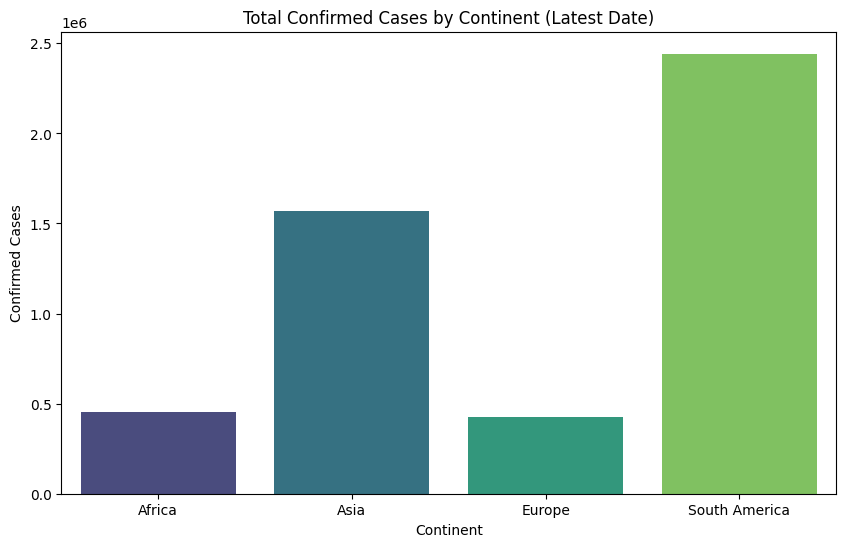

In [113]:
continent_map = {
    'India': 'Asia',
    'USA': 'North America',
    'Brazil': 'South America',
    'France': 'Europe',
    'Germany': 'Europe',
    'China': 'Asia',
    'South Africa': 'Africa',
   
}


latest_data['Continent'] = latest_data['Country/Region'].map(continent_map)


continent_summary = latest_data.groupby('Continent')['Confirmed'].sum().reset_index()


plt.figure(figsize=(10,6))
sns.barplot(data=continent_summary, x='Continent', y='Confirmed', palette='viridis')

plt.title('Total Confirmed Cases by Continent (Latest Date)')
plt.xlabel('Continent')
plt.ylabel('Confirmed Cases')
plt.show()

In [ ]:

country_summary = latest_data.groupby('Country/Region')['Confirmed'].sum().values  


mean_confirmed = np.mean(country_summary)


median_confirmed = np.median(country_summary)




print(f"Mean confirmed cases: {mean_confirmed}")
print(f"Median confirmed cases: {median_confirmed}")



Mean confirmed cases: 88130.935828877
Median confirmed cases: 5059.0


In [119]:
death_counts = latest_data.groupby('Country/Region')['Deaths'].sum().values  


variance_deaths = np.var(death_counts, ddof=0)  
# For sample variance use ddof=1: np.var(death_counts, ddof=1)

std_deaths = np.std(death_counts, ddof=0)  # population std
# For sample std use ddof=1: np.std(death_counts, ddof=1)

print(f"Variance of death counts: {variance_deaths}")
print(f"Standard deviation of death counts: {std_deaths}")

Variance of death counts: 197746914.53841978
Standard deviation of death counts: 14062.251403613142


In [126]:


df['Date'] = pd.to_datetime(df['Date'])


latest_data = df[df['Date'] == df['Date'].max()]

country_summary = latest_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum()


correlation = country_summary['Confirmed'].corr(country_summary['Deaths'])
print(f"Correlation between confirmed and death counts: {correlation}")


corr_matrix = np.corrcoef(country_summary['Confirmed'], country_summary['Deaths'])
print(f"Numpy correlation coefficient: {corr_matrix[0,1]}")


Correlation between confirmed and death counts: 0.9346984343393535
Numpy correlation coefficient: 0.9346984343393535


In [131]:



country_summary = latest_data.groupby('Country/Region')['Confirmed'].sum()  


total_countries = country_summary.shape[0]

countries_over_100k = (country_summary > 100000).sum()


probability = countries_over_100k / total_countries

print(f"Probability that a random country has more than 100,000 confirmed cases: {probability:.4f}")


Probability that a random country has more than 100,000 confirmed cases: 0.1283


In [134]:
import pandas as pd



df['Date'] = pd.to_datetime(df['Date'])

latest_data = df[df['Date'] == df['Date'].max()]

country_summary = latest_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum()

country_summary['Death_Rate'] = (country_summary['Deaths'] / country_summary['Confirmed']) * 100


total_countries = country_summary.shape[0]

# Number of countries with death rate > 5%
countries_over_5pct = (country_summary['Death_Rate'] > 5).sum()

probability = countries_over_5pct / total_countries

print(f"Probability that a random country has a death rate > 5%: {probability:.4f}")


Probability that a random country has a death rate > 5%: 0.1551


In [136]:
confirmed_array = country_summary['Confirmed'].to_numpy()
deaths_array = country_summary['Deaths'].to_numpy()

print("Confirmed cases array:", confirmed_array)
print("Deaths array:", deaths_array)


Confirmed cases array: [  36263    4880   27973     907     950      86  167416   37390   15303
   20558   30446     382   39482  226225     110   67251   66428      48
    1770      99   71181   10498     739 2442375     141   10621    1100
     350     378    2328     226   17110  116458    4599     922  347923
   86783  257101     354    3200    8844   15841   15655    4881    2532
    1060   15516   13761    5059      18   64156   81161   92482   15035
    3071     265    2034    2316   14547      27    7398  220352    7189
     326    1137  207112   33624    4227      14      23   45309    7055
    1954     389    7340      12   39741    4448    1854 1480073  100303
  293606  112585   25892   63985  246286     853   31142    1176   84648
   17975    7413   64379   33296      20    1219    3882     505    1167
    2827      86    2019    6321    9690    3664    8904    3369    2513
     701    6208     344  395489   23154     116     289    2893   20887
    1701    1843   18752   5

In [137]:

active_array = confirmed_array - deaths_array

print("Active cases array (confirmed - deaths):", active_array)


Active cases array (confirmed - deaths): [  34994    4736   26810     855     909      83  164357   36679   15136
   19845   30023     371   39341  223260     103   66713   56606      46
    1735      99   68534   10204     737 2354757     138   10274    1047
     344     377    2306     226   16719  107514    4540     847  338736
   82127  248324     347    3146    8636   15726   15559    4742    2445
    1041   15143   13148    5001      18   63073   75629   87830   14627
    3020     265    1965    2282   14319      27    7069  190140    7140
     318    1121  197987   33456    4025      14      23   43548    7010
    1928     369    7182      12   38575    3852    1844 1446665   95465
  277694  108127   24128   63511  211174     843   30144    1165   84063
   17690    7228   63941   31995      20    1188    3831     493    1095
    2763      85    1939    6209    9599    3565    8780    3354    2389
     692    6052     334  351467   22406     112     289    2848   20571
    1690  

In [138]:
np.dot(confirmed_array,deaths_array)

np.int64(997285387205)

In [140]:

matrix = country_summary[['Confirmed', 'Deaths']].to_numpy()


weights = np.array([0.7, 0.3])

weighted_sum = matrix @ weights  
print("Weighted sum array:", weighted_sum)



Weighted sum array: [2.5764800e+04 3.4592000e+03 1.9930000e+04 6.5050000e+02 6.7730000e+02
 6.1100000e+01 1.1810890e+05 2.6386300e+04 1.0762200e+04 1.4604500e+04
 2.1439100e+04 2.7070000e+02 2.7679700e+04 1.5924700e+05 7.9100000e+01
 4.7237100e+04 4.9446200e+04 3.4200000e+01 1.2495000e+03 6.9300000e+01
 5.0620800e+04 7.4368000e+03 5.1790000e+02 1.7359479e+06 9.9600000e+01
 7.5388000e+03 7.8590000e+02 2.4680000e+02 2.6490000e+02 1.6362000e+03
 1.5820000e+02 1.2094300e+04 8.4203800e+04 3.2370000e+03 6.6790000e+02
 2.4630220e+05 6.2144900e+04 1.8260380e+05 2.4990000e+02 2.2562000e+03
 6.2532000e+03 1.1123200e+04 1.0987300e+04 3.4584000e+03 1.7985000e+03
 7.4770000e+02 1.0973100e+04 9.8166000e+03 3.5587000e+03 1.2600000e+01
 4.5234100e+04 5.8472300e+04 6.6133000e+04 1.0646900e+04 2.1650000e+03
 1.8550000e+02 1.4445000e+03 1.6314000e+03 1.0251300e+04 1.8900000e+01
 5.2773000e+03 1.6331000e+05 5.0470000e+03 2.3060000e+02 8.0070000e+02
 1.4771590e+05 2.3587200e+04 3.0195000e+03 9.8000000e+00 